In [37]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
stockName = input("Enter the stock name: ")
data = yf.download(stockName, start="2002-01-01", end="2023-1-1" , auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2004-06-14,5.170988,5.761958,5.170988,5.761958,10
2004-06-15,5.880152,5.880152,5.872765,5.872765,10
2004-06-16,6.618865,6.618865,6.352929,6.352929,1500
2004-06-17,5.828442,5.828442,5.252247,5.289182,6500
2004-06-18,5.259634,5.259634,5.259634,5.259634,1000


In [47]:
data.shape 

(4588, 5)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4588 entries, 2004-06-14 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4588 non-null   float64
 1   High    4588 non-null   float64
 2   Low     4588 non-null   float64
 3   Close   4588 non-null   float64
 4   Volume  4588 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 215.1 KB


In [41]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


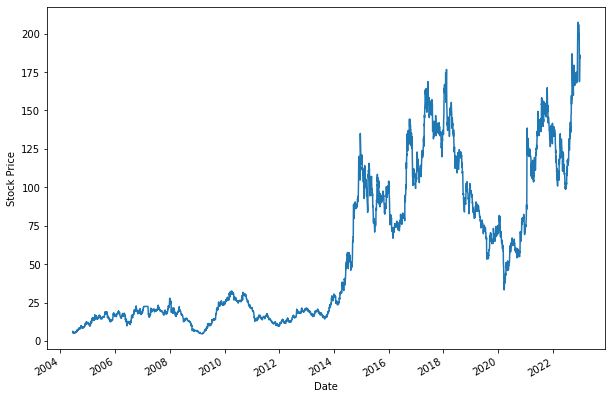

In [49]:
data.Close.plot(figsize=(10, 7))
plt.ylabel("Stock Price")
plt.xlabel("Date")
plt.show()

C:\Users\Aric\AppData\Local\Temp\ipykernel_2700\1783946029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Close)


<AxesSubplot:xlabel='Close', ylabel='Density'>

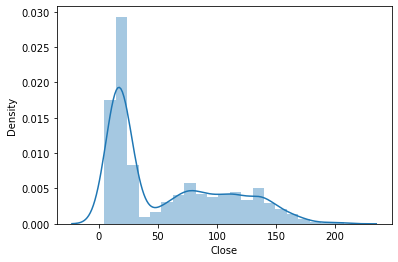

In [50]:
sns.distplot(data.Close)

C:\Users\Aric\AppData\Local\Temp\ipykernel_2700\2824574419.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Open)


<AxesSubplot:xlabel='Open', ylabel='Density'>

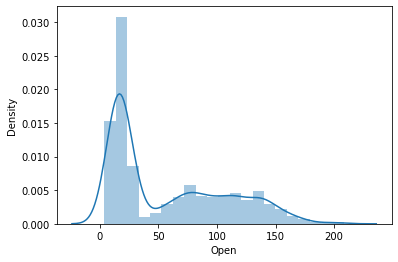

In [51]:
sns.distplot(data.Open)

C:\Users\Aric\AppData\Local\Temp\ipykernel_2700\327981933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.High)


<AxesSubplot:xlabel='High', ylabel='Density'>

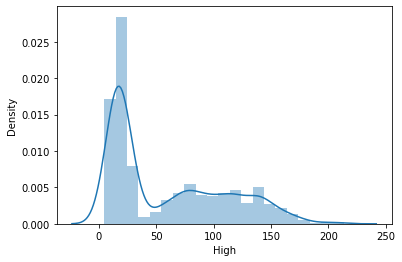

In [52]:
sns.distplot(data.High)

Conclusion 

- how data is distributed
- how data is correlated
- how data is related to each other
- how data is related to target variable
- it is a non linear data so regession model will not work properly

Model

In [53]:
from sklearn.model_selection import train_test_split
X = data.drop(["Close"] , axis=1)
y = data["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3670, 4)
X_test shape:  (918, 4)
y_train shape:  (3670,)
y_test shape:  (918,)


In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predition = lr.predict(X_test)

In [57]:
print("Actual value of the stock : " , y_test.iloc[0])
print("Predicted value of the stock : " , predition[0])

Actual value of the stock :  126.53677368164062
Predicted value of the stock :  126.8181086548141


In [58]:
#### mse --> mean squared error
#### rmse --> root mean squared error
#### r2 --> r square 1.0 is the best value

def calculate_matrice(y_test , predition):
    '''
        This function will calculate the mse , rmse and r2 score
        y_test --> actual value of the stock
        predition --> predicted value of the stock
    '''

    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_test, predition)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predition)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R2 Score: ", r2)


calculate_matrice(y_test , predition)

Mean Squared Error:  0.5033583448110067
Root Mean Squared Error:  0.709477515366771
R2 Score:  0.9997771910921638


In [59]:
from sklearn.linear_model import Ridge , Lasso

ridge = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

c:\Users\Aric\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.346e+03, tolerance: 9.186e+02
  model = cd_fast.enet_coordinate_descent(


In [60]:
calculate_matrice(y_test , ridge_pred)

Mean Squared Error:  0.5033501922312653
Root Mean Squared Error:  0.7094717698621034
R2 Score:  0.99977719470086


In [61]:
calculate_matrice(y_test , lasso_pred)

Mean Squared Error:  1.4362191025939854
Root Mean Squared Error:  1.19842359063646
R2 Score:  0.9993642652139151


### SVM works if we have lots of features

In [62]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

parameters = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel' : ['rbf']
}

grid_svr = GridSearchCV(svr, parameters, refit=True, verbose=3)

grid_svr.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.386 total time=   1.7s
[CV 2/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.294 total time=   1.5s
[CV 3/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.373 total time=   1.9s
[CV 4/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.424 total time=   1.7s
[CV 5/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.383 total time=   1.7s
[CV 1/5] END ..C=0.001, gamma=0.01, kernel=rbf;, score=-0.386 total time=   1.8s
[CV 2/5] END ..C=0.001, gamma=0.01, kernel=rbf;, score=-0.294 total time=   1.7s
[CV 3/5] END ..C=0.001, gamma=0.01, kernel=rbf;, score=-0.373 total time=   1.7s
[CV 4/5] END ..C=0.001, gamma=0.01, kernel=rbf;, score=-0.424 total time=   1.9s
[CV 5/5] END ..C=0.001, gamma=0.01, kernel=rbf;, score=-0.383 total time=   1.7s
[CV 1/5] END ...C=0.001, gamma=0.1, kernel=rbf;, score=-0.386 total time=   1.7s
[CV 2/5] END ...C=0.001, gamma=0.1, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             verbose=3)

In [63]:
svr_pred = grid_svr.predict(X_test)
svr_pred

array([59.69864526, 52.6231495 , 59.69855954, 59.69208825, 59.69855954,
       59.69855954, 59.69855954, 57.28897122, 59.69855954, 59.69855954,
       59.86834829, 58.33043582, 59.69855954, 59.69855954, 59.69855954,
       59.69855954, 59.69855954, 59.69855954, 59.69855954, 59.69855954,
       38.20633589, 59.69855954, 59.69855954, 56.81772963, 59.69855954,
       59.69855954, 59.69855954, 59.69855954, 59.69855954, 59.61838917,
       35.6657927 , 59.69855954, 43.52939328, 59.69855954, 59.69855954,
       59.69855954, 59.69855954, 59.69538609, 22.47222654, 59.69855954,
       59.69855954, 59.69855954, 59.69855954, 59.69855954, 59.69855954,
       59.6985615 , 59.69855954, 59.69855954, 43.95766639, 59.69855954,
       59.69855954, 59.69855927, 59.69855954, 59.69855954, 64.59330237,
       59.69855954, 59.69855954, 59.69855954, 59.69855954, 59.69855954,
       59.69855954, 59.69855954, 59.69855954, 59.69853462, 59.69855953,
       59.69855954, 59.69855954, 59.69855954, 59.69855954, 37.63

In [64]:
import joblib
joblib.dump(ridge, "stock_prediction.pkl")

model = joblib.load("stock_prediction.pkl")
